In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

In [4]:
for i in data:
    x = data[i].isnull().sum()
    if x > 0:
        print(i,'\t', round((x/len(data)*100), 2))

LotFrontage 	 17.74
Alley 	 93.77
MasVnrType 	 59.73
MasVnrArea 	 0.55
BsmtQual 	 2.53
BsmtCond 	 2.53
BsmtExposure 	 2.6
BsmtFinType1 	 2.53
BsmtFinType2 	 2.6
Electrical 	 0.07
FireplaceQu 	 47.26
GarageType 	 5.55
GarageYrBlt 	 5.55
GarageFinish 	 5.55
GarageQual 	 5.55
GarageCond 	 5.55
PoolQC 	 99.52
Fence 	 80.75
MiscFeature 	 96.3


From the above, we can see the following columns have near 50% missing data:
- **Alley**
- **MasVnrType** 	 
- **PoolQC**
- **Fence** 
- **MiscFeature** 	
- **FireplaceQu** 	 

Hence, removing the columns from the dataset

In [5]:
data.drop(columns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature',
                          'FireplaceQu'], inplace=True)

In [6]:
for i in data:
    x = data[i].isnull().sum()
    if x > 0:
        print(i,'\t', round((x/len(data)*100), 2))

LotFrontage 	 17.74
MasVnrArea 	 0.55
BsmtQual 	 2.53
BsmtCond 	 2.53
BsmtExposure 	 2.6
BsmtFinType1 	 2.53
BsmtFinType2 	 2.6
Electrical 	 0.07
GarageType 	 5.55
GarageYrBlt 	 5.55
GarageFinish 	 5.55
GarageQual 	 5.55
GarageCond 	 5.55


In [7]:
x = ['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
data[x].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


As we can see, the data for **LotFrontage** is neither left nor right skewed. hence, filling the empty with mean

In [8]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

For filling up the remaining null values in the dataset, we do the following:
- Filling the object type columns with the mode of the column
- **MasVnrArea** is extremely right skewed, hence filling it with the median
- Columns related to Garage for data with no Garage present, filling them up with 'NA' and **GarageYrBlt** with 0

In [11]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [12]:
data.fillna('NA', inplace=True)
data['GarageYrBlt'].replace('NA', 0, inplace=True)

In [13]:
# Removing the column 'Id' since it does not provide any useful data
data.pop('Id')

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
num_cols = data.select_dtypes(['int64', 'float64']).columns
cat_cols = data.select_dtypes(['object']).columns
num_cols = num_cols.drop('SalePrice')

Plotting all numerical variables against the target variable

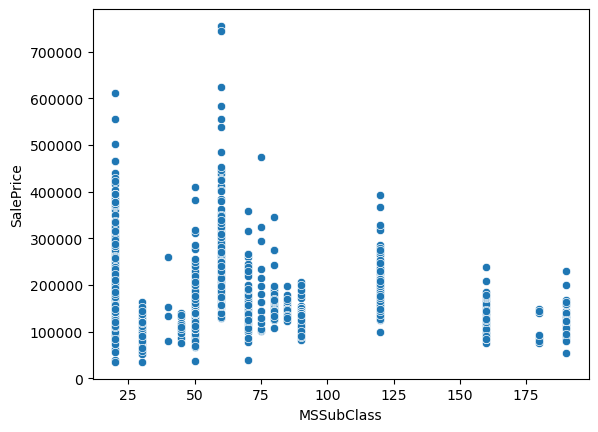

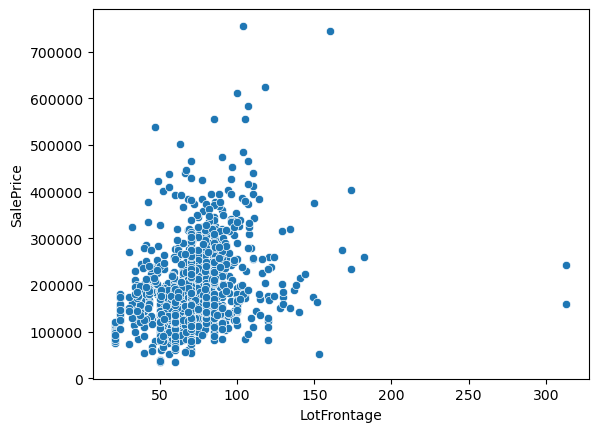

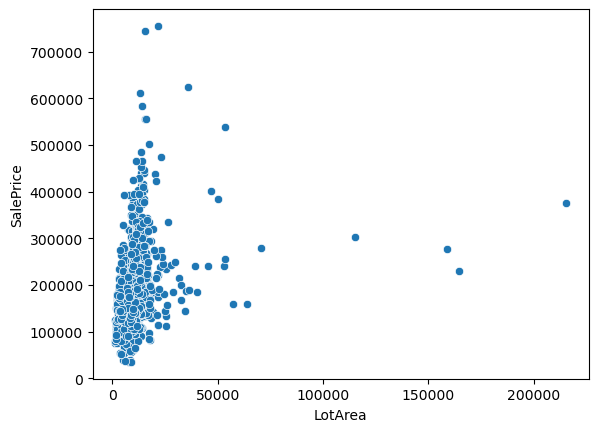

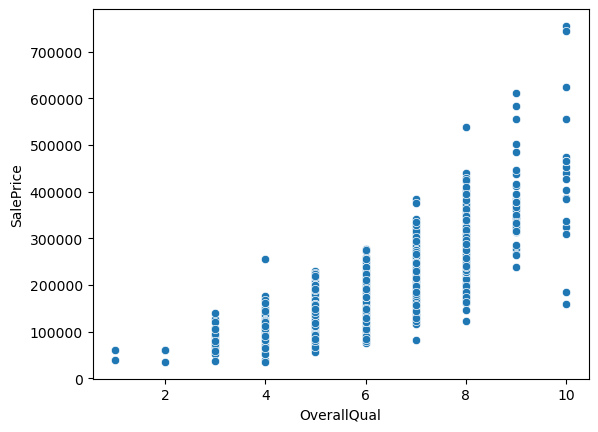

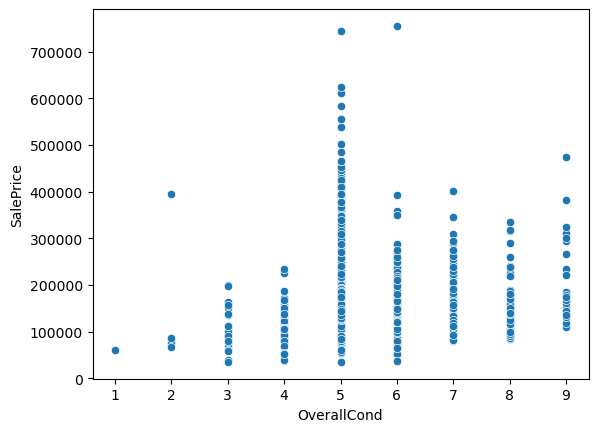

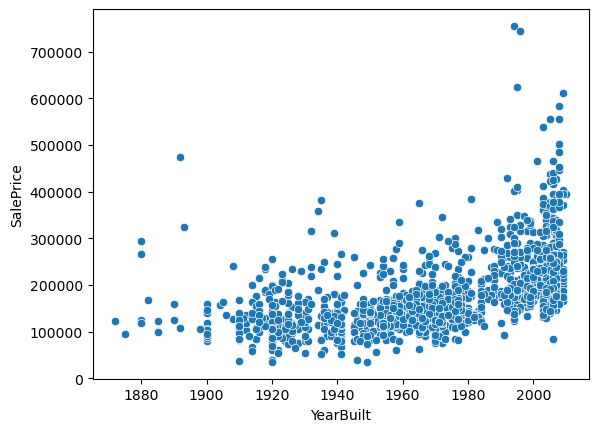

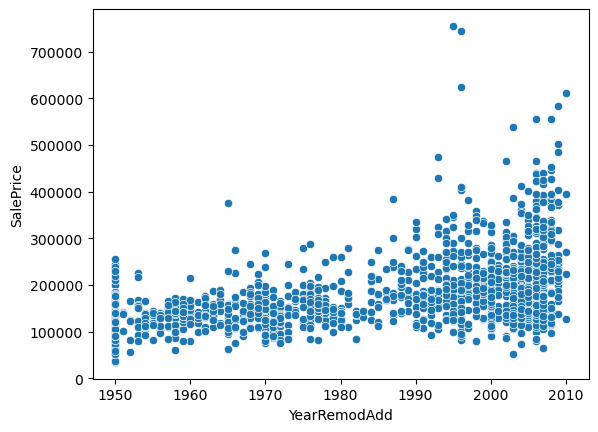

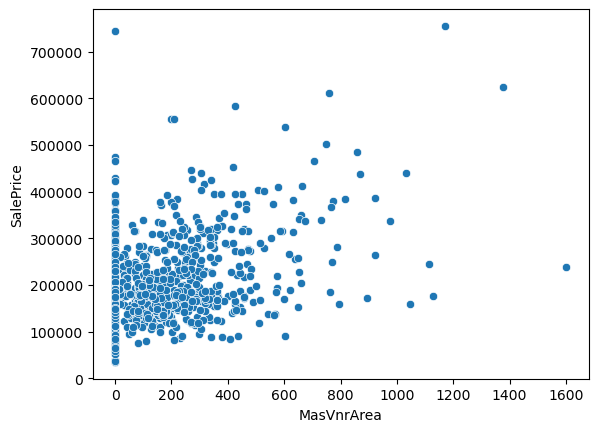

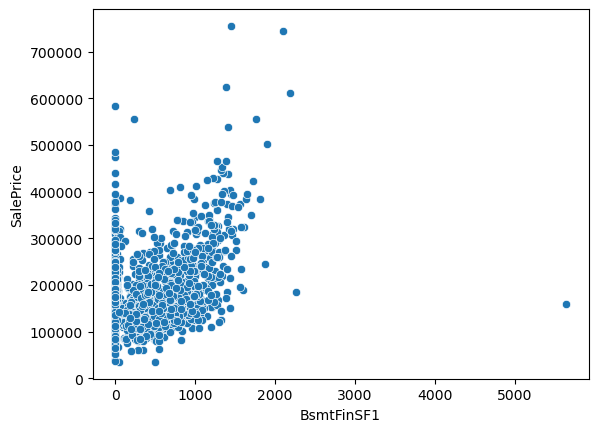

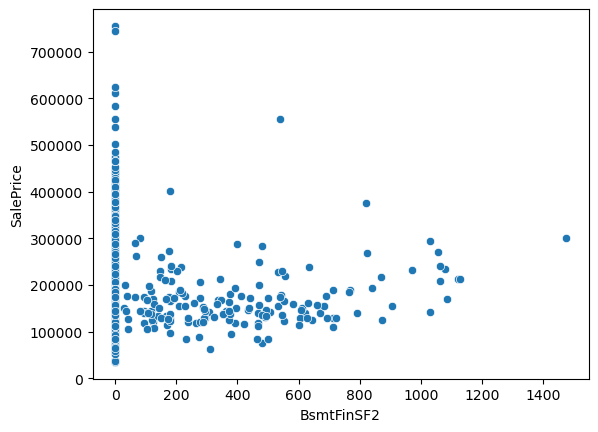

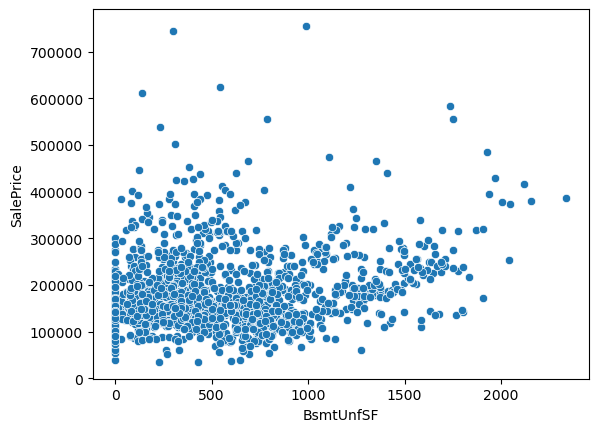

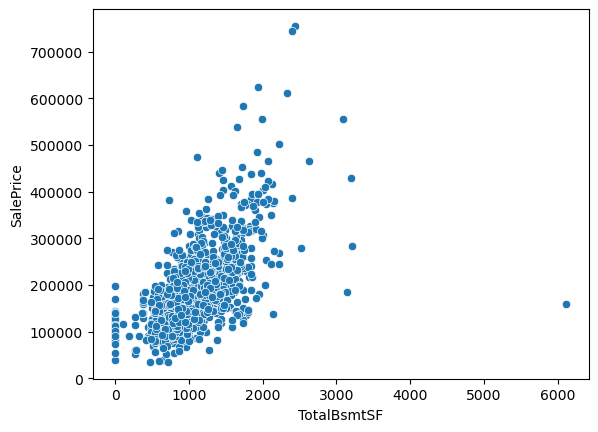

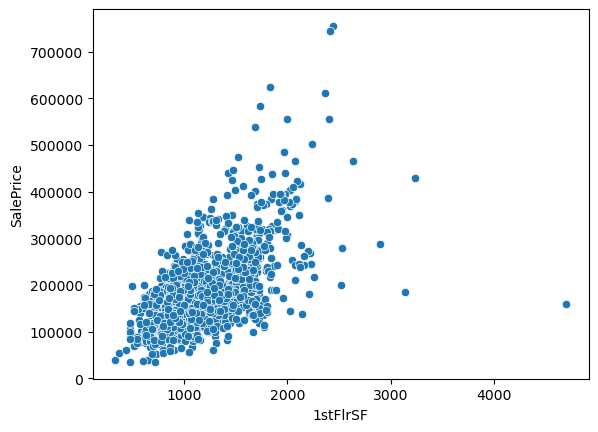

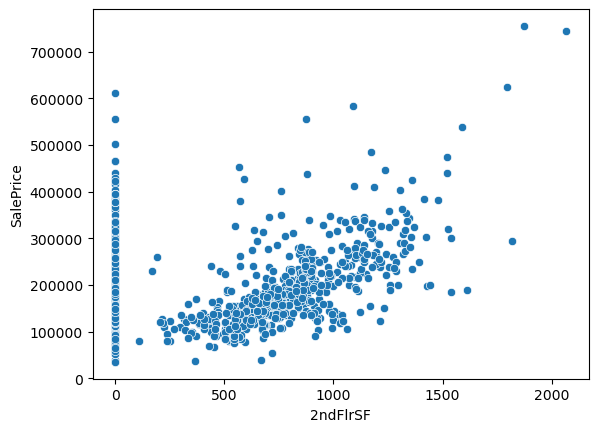

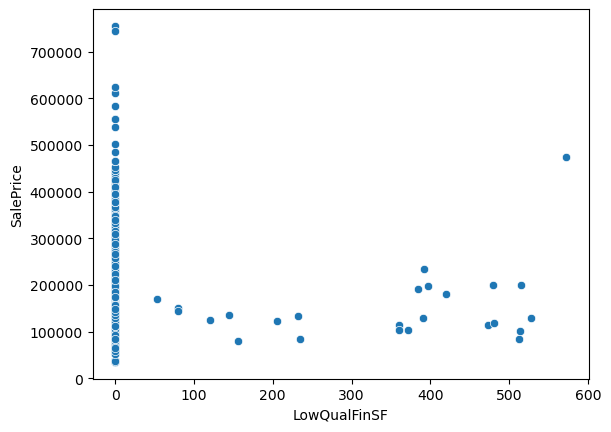

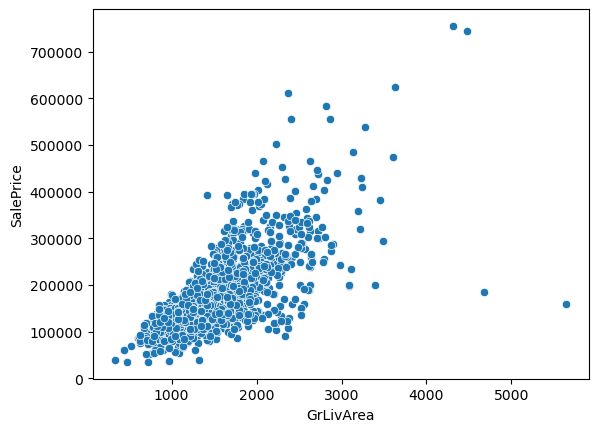

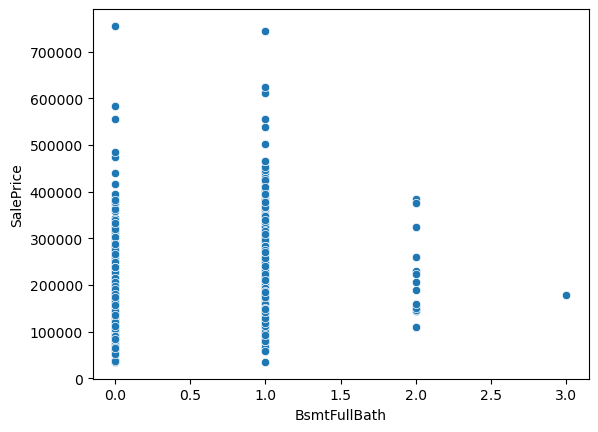

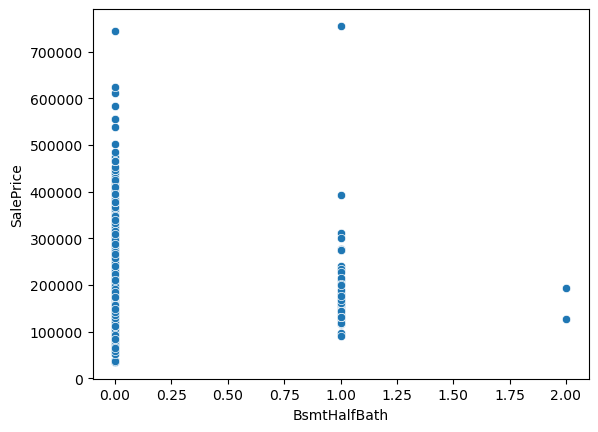

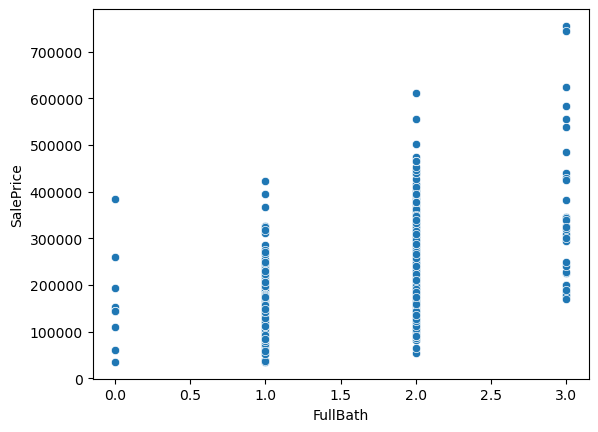

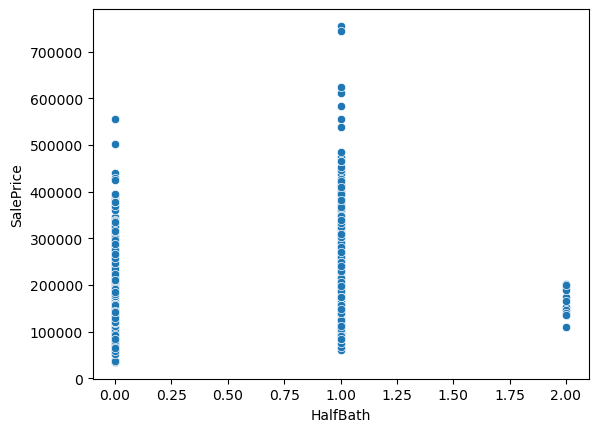

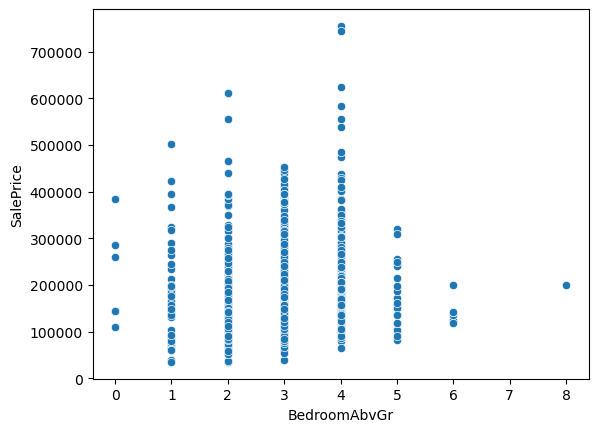

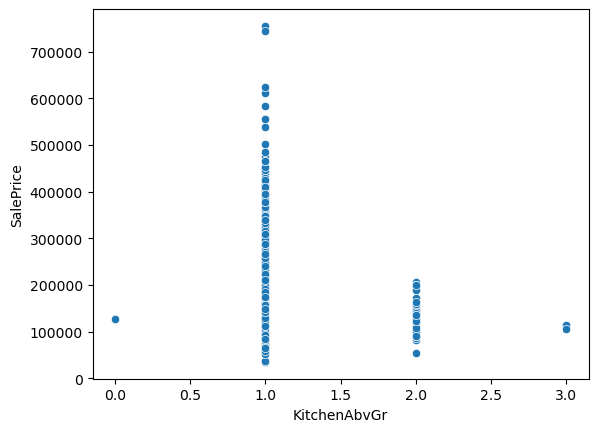

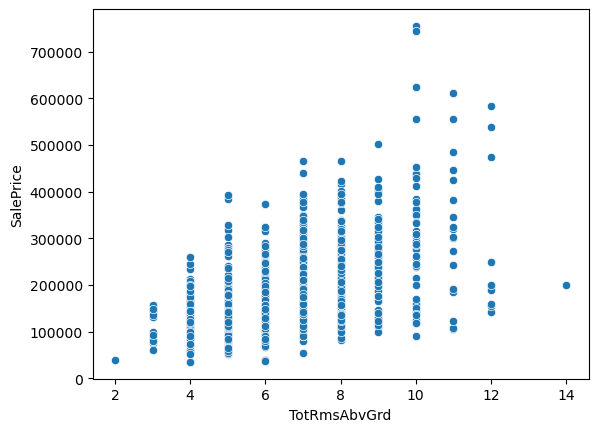

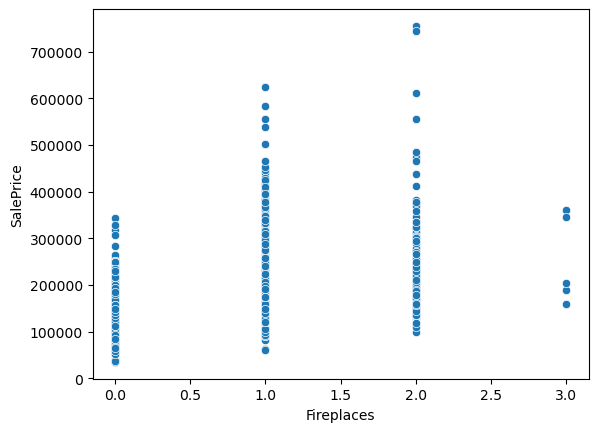

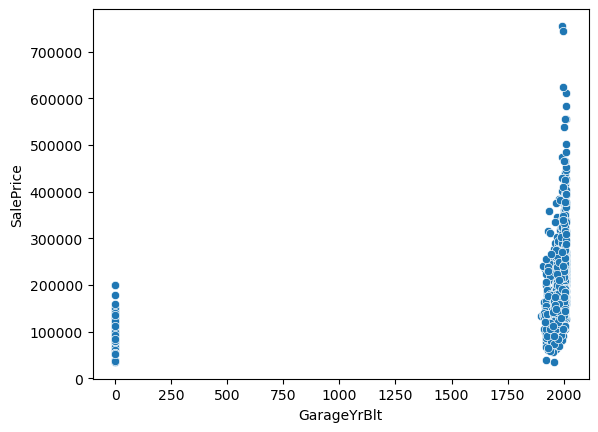

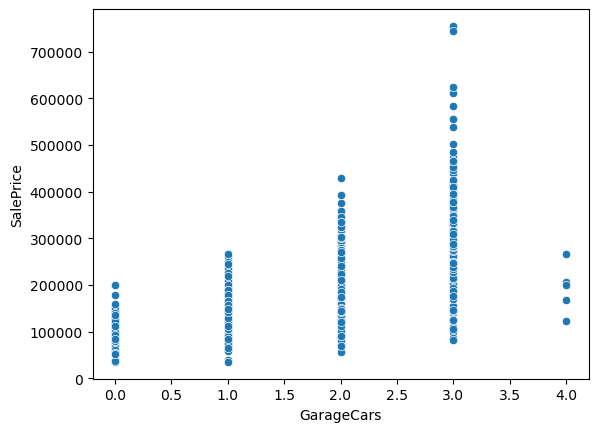

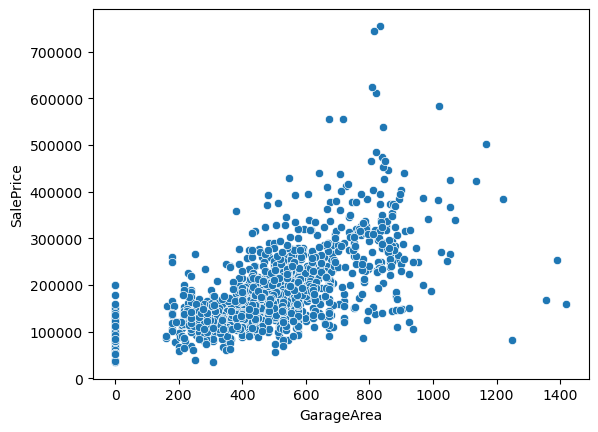

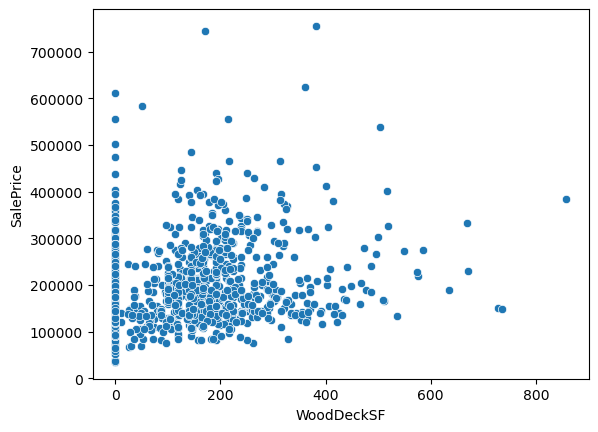

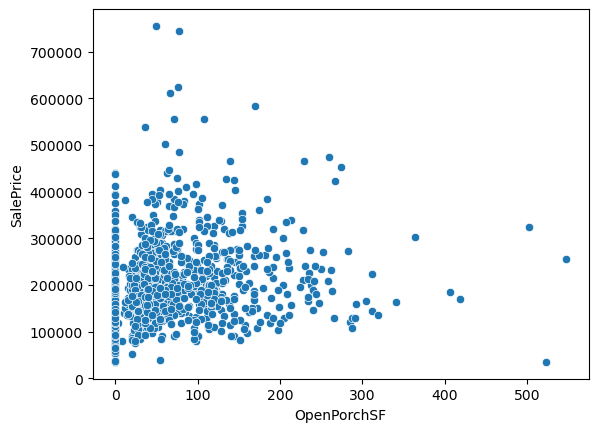

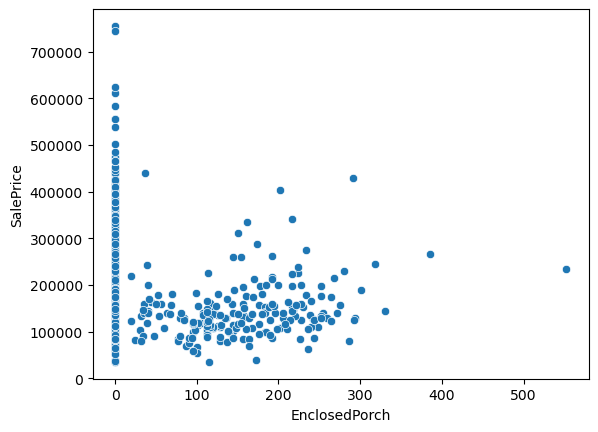

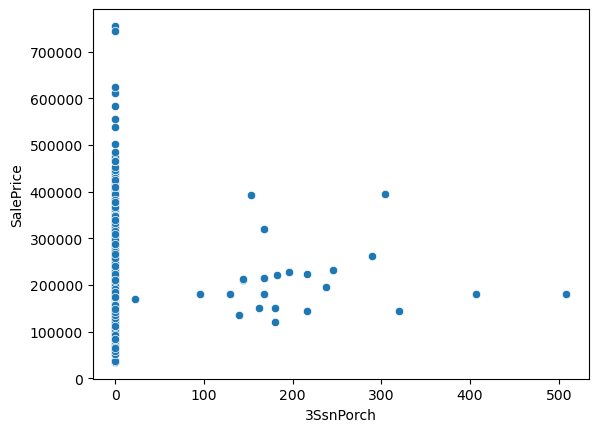

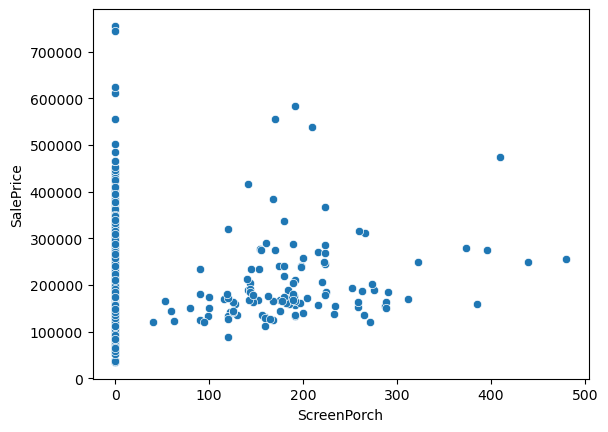

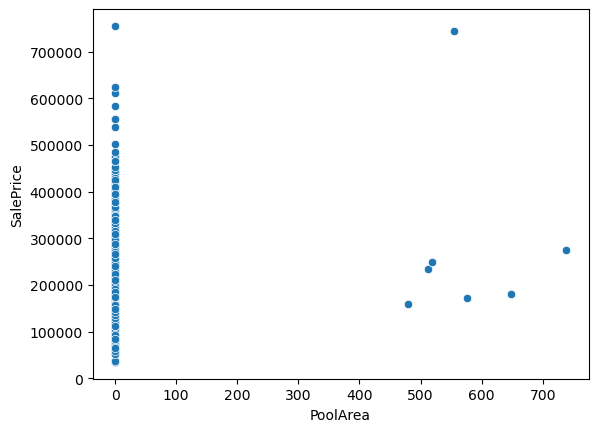

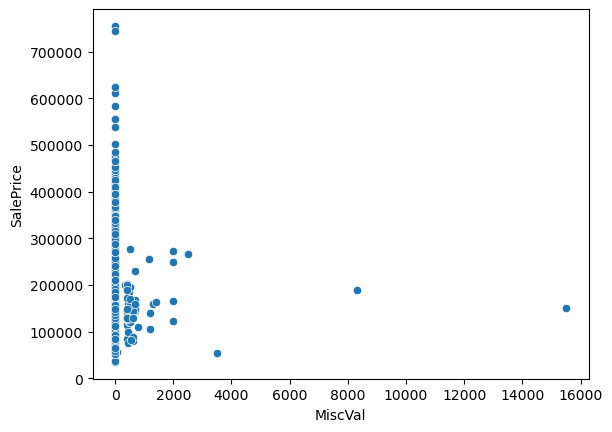

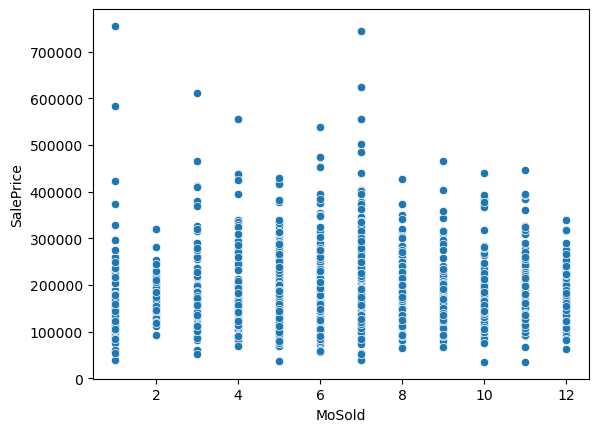

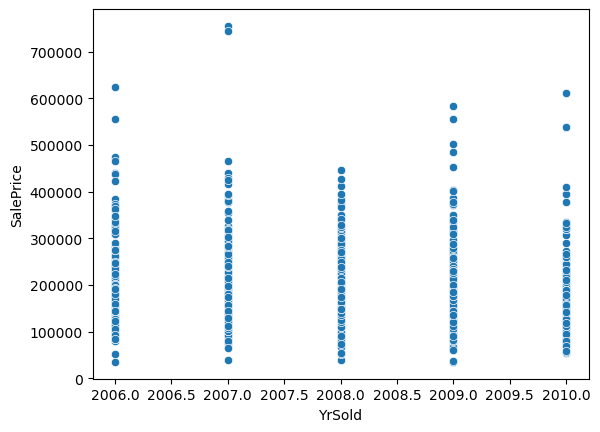

In [17]:
for i in num_cols:
    sns.scatterplot(data=data, x=i, y=data['SalePrice'])
    plt.show()

From the above plot of numerical columns against the target variable, we find that the following columns have a linear relation with the target variable:

- **LotFrontage**
- **LotArea**
- **OverallQual**
- **OverallCond**
- **YearBuilt**
- **YearRemodAdd**
- **MasVnrArea**
- **BsmtFinSF1**
- **BsmtUnfSF**
- **TotalBsmtSF**
- **1stFlrSF**
- **2ndFlrSF**
- **GrLivArea**
- **FullBath**
- **TotalRmsAbvGrd**
- **GarageCars**
- **GarageArea**
- **WoodDeckSF**
- **OpenPorchSF**

Plotting all categorical variables against the target variable

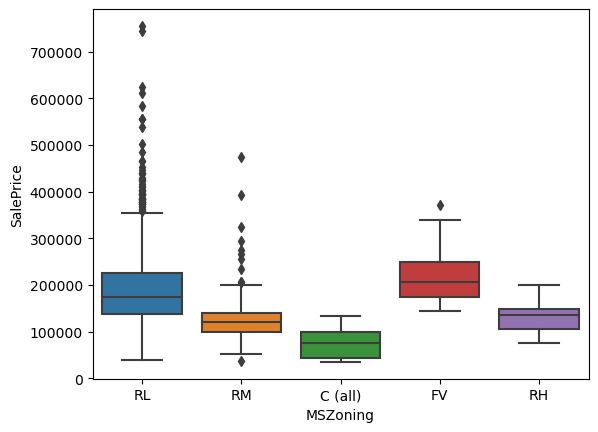

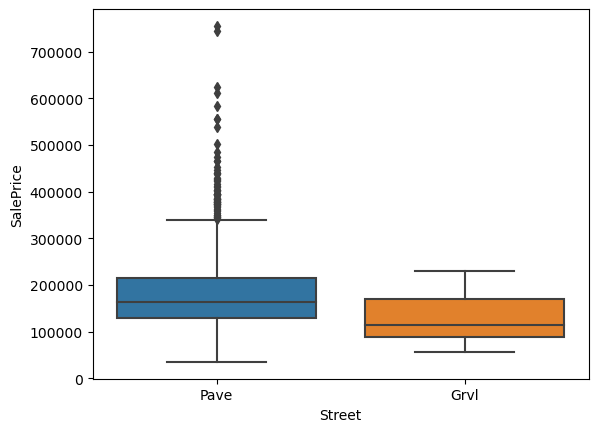

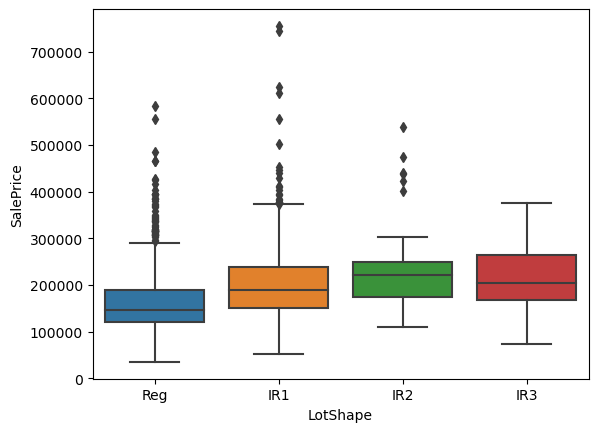

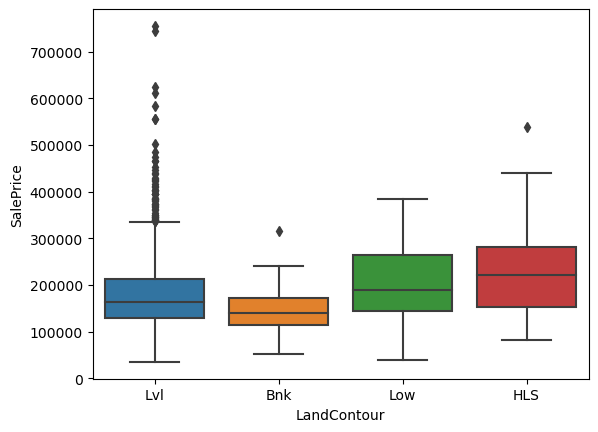

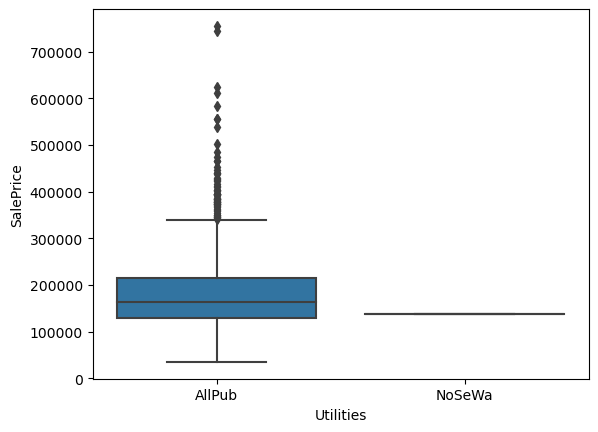

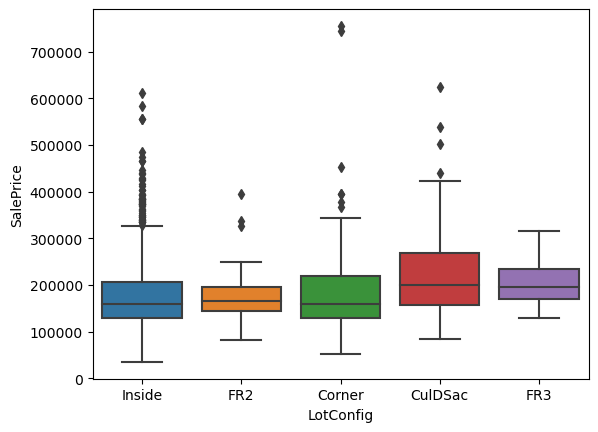

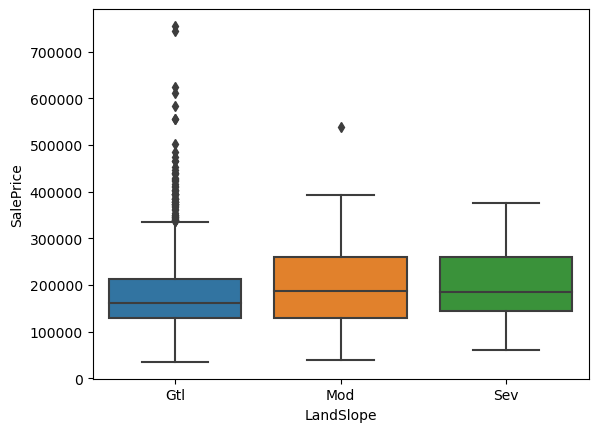

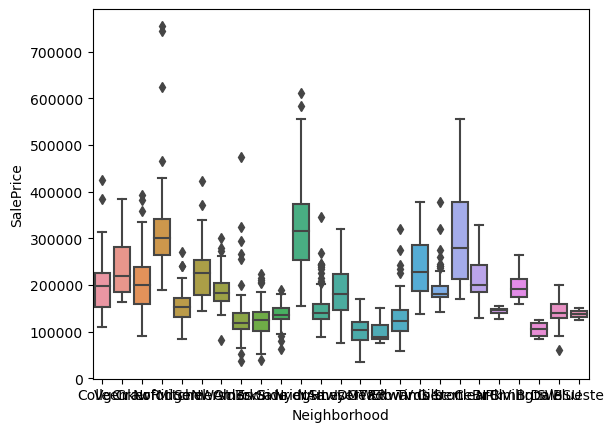

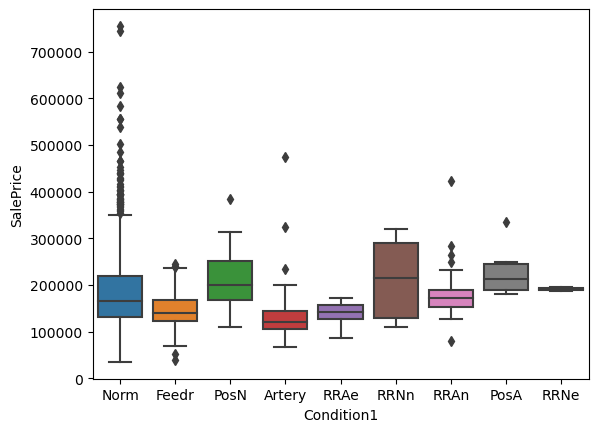

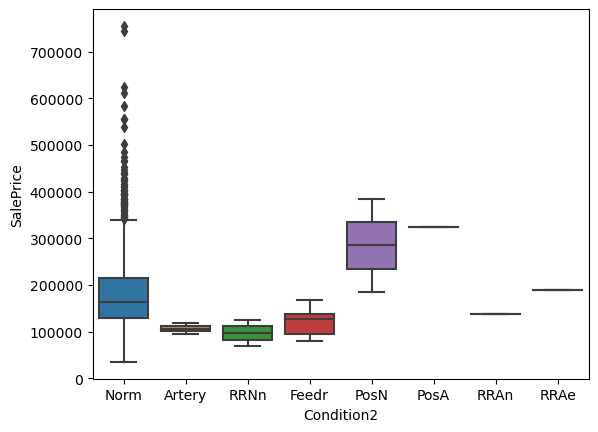

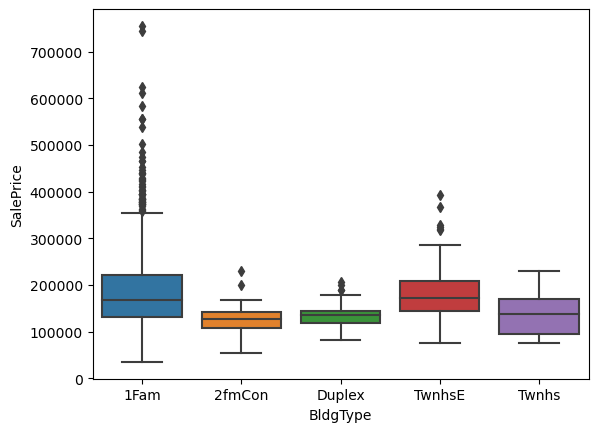

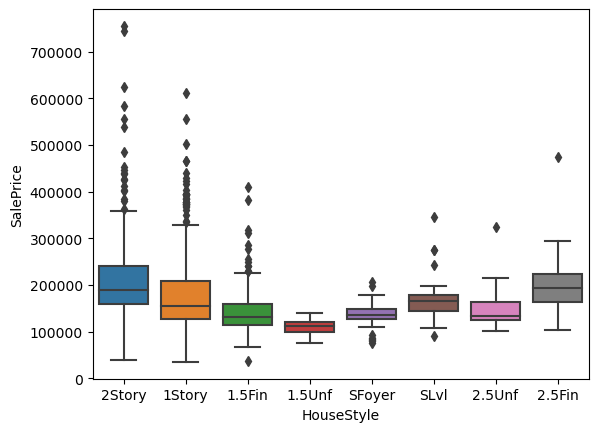

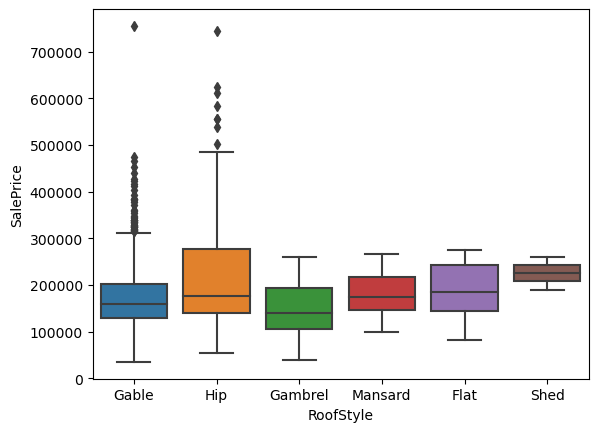

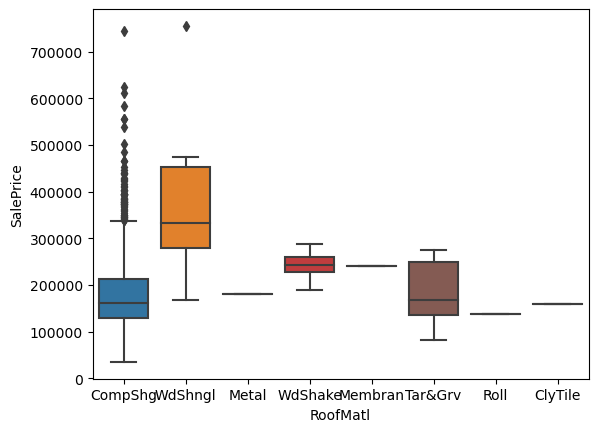

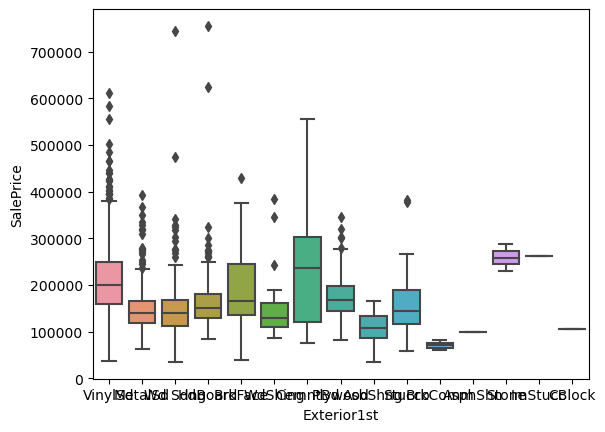

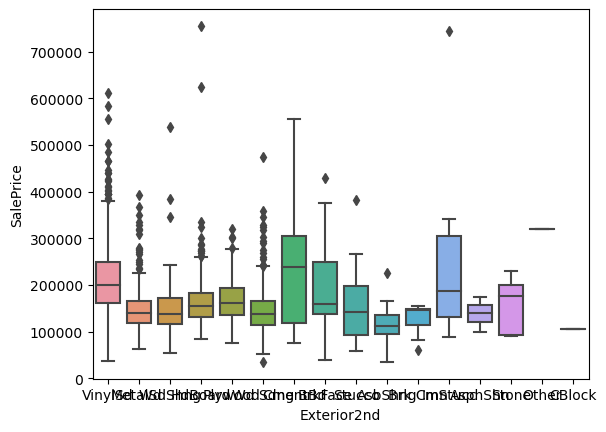

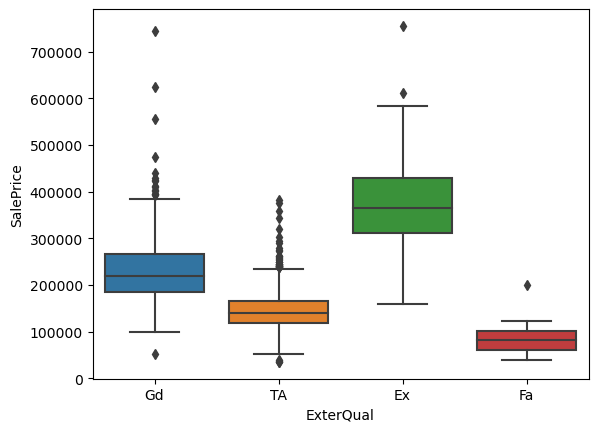

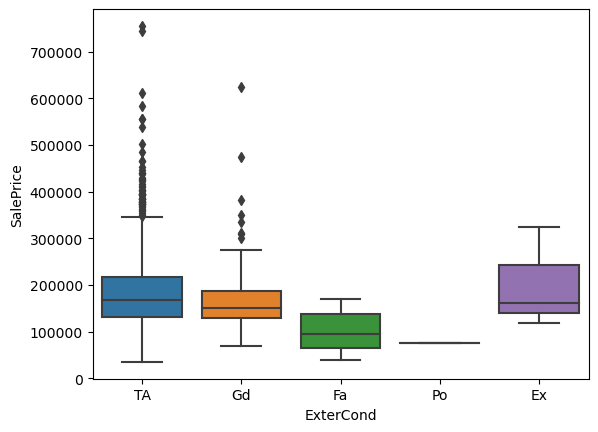

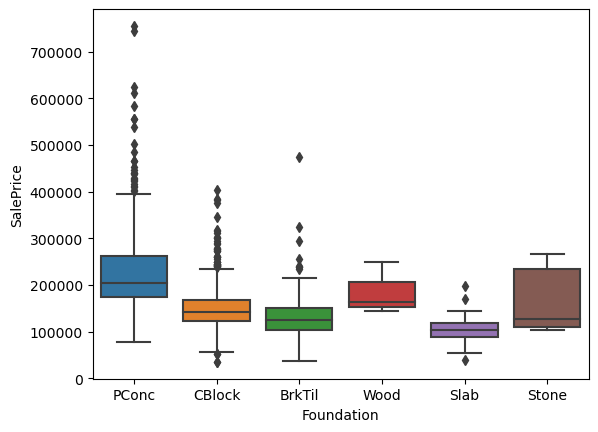

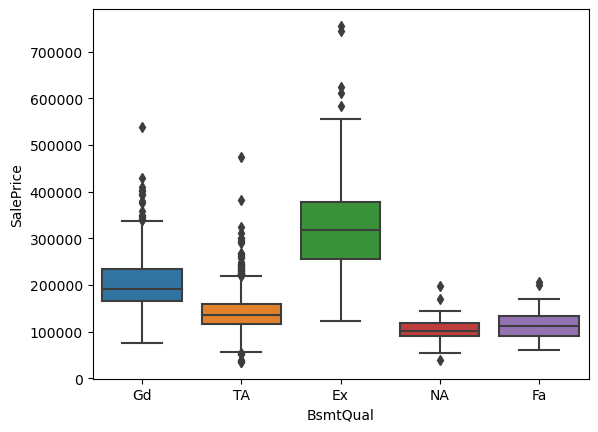

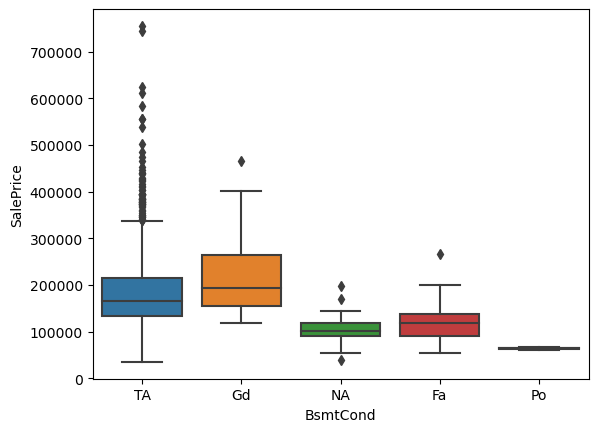

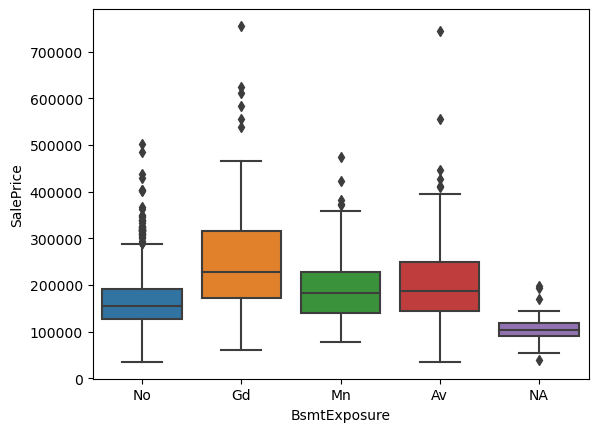

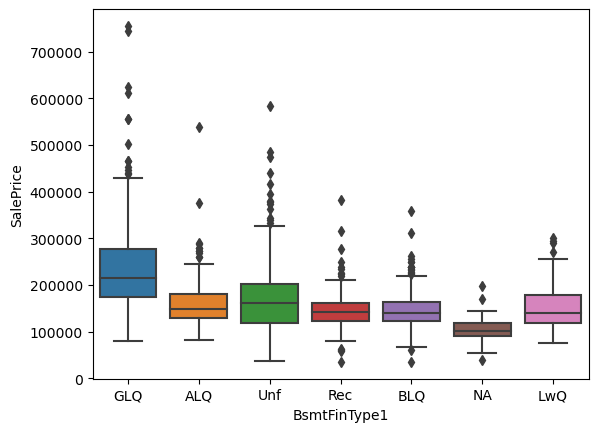

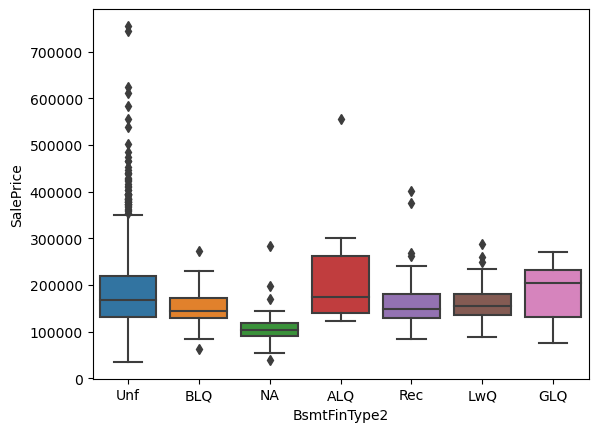

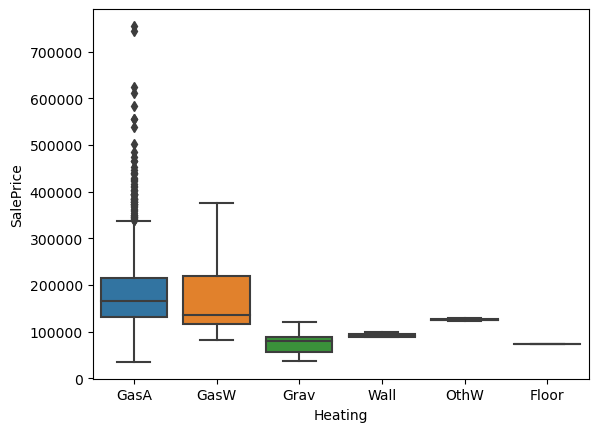

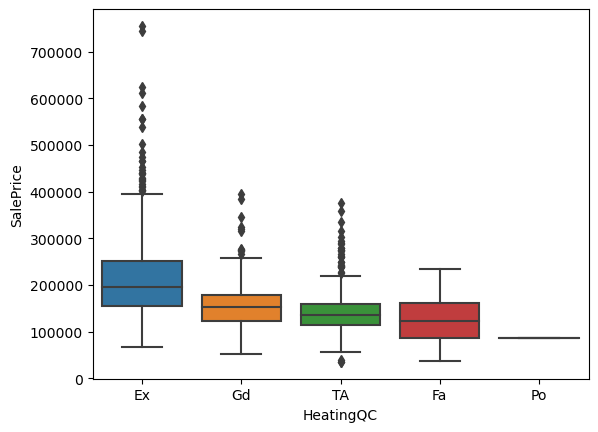

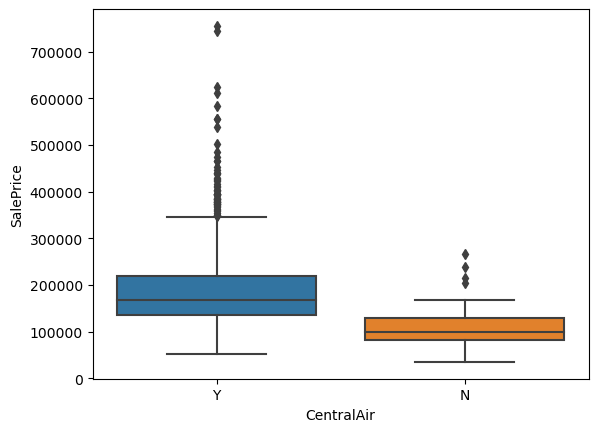

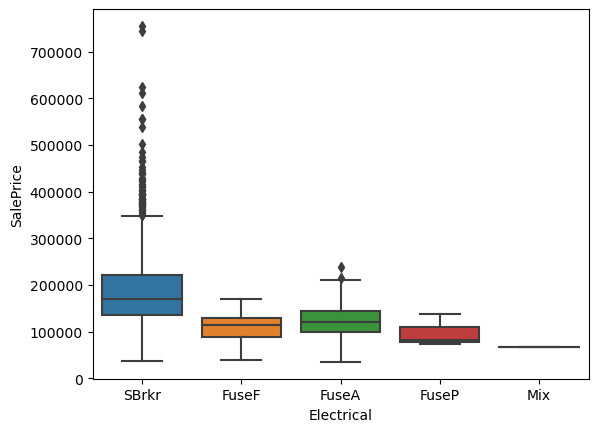

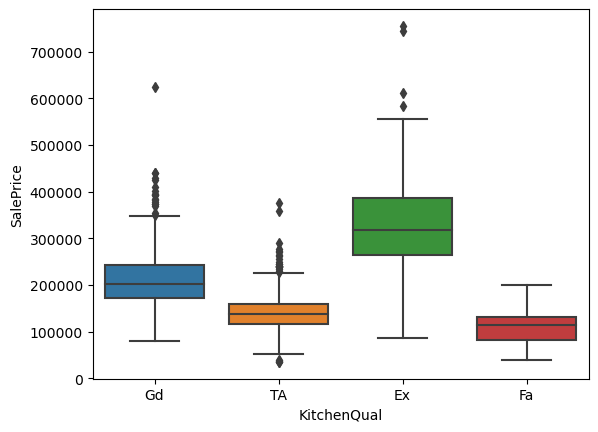

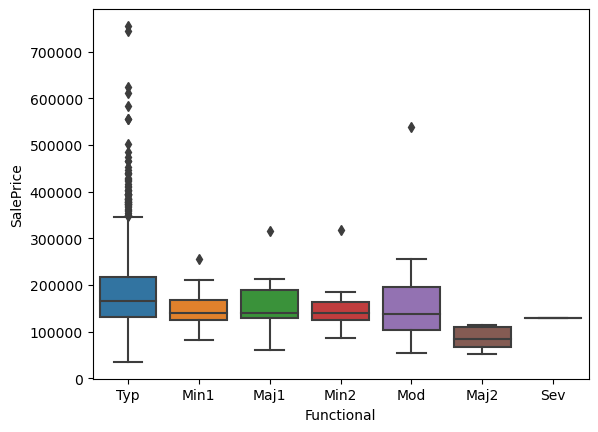

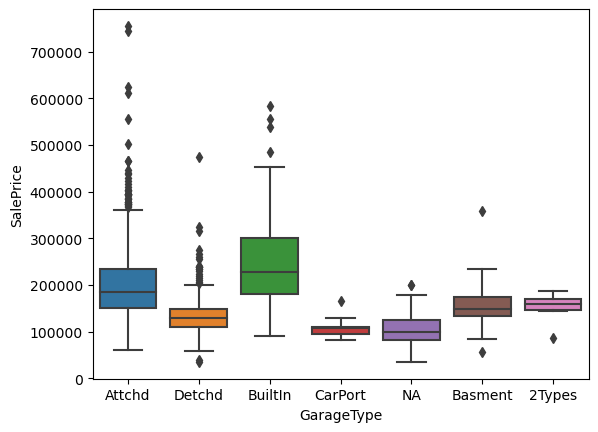

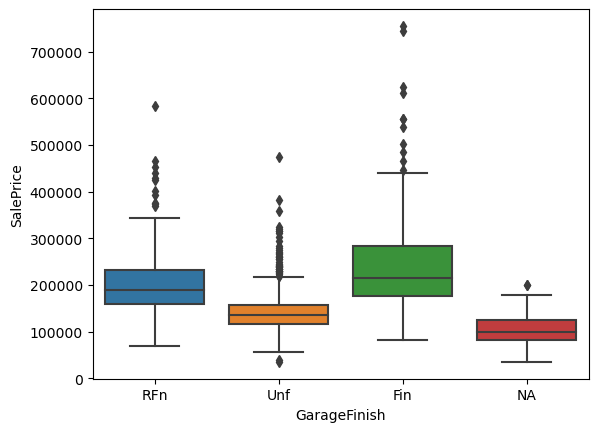

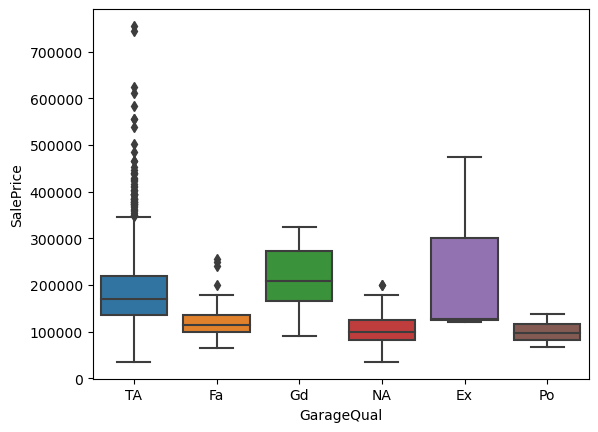

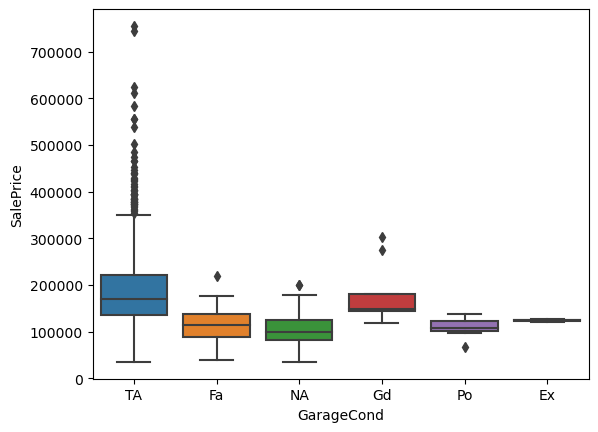

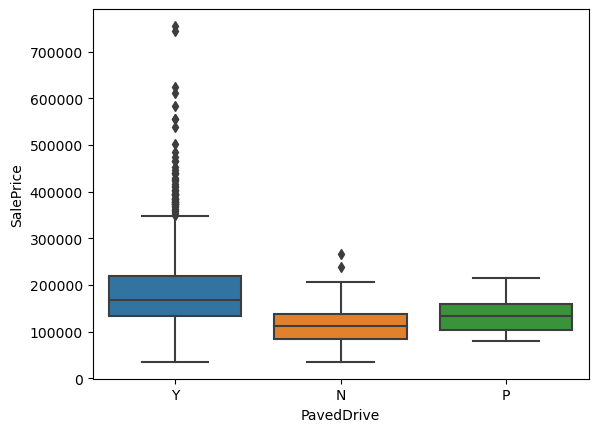

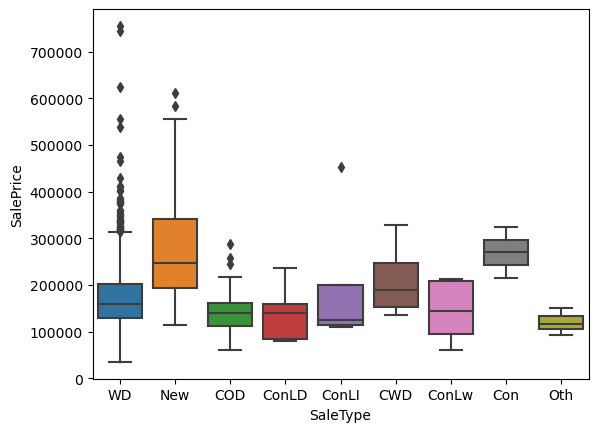

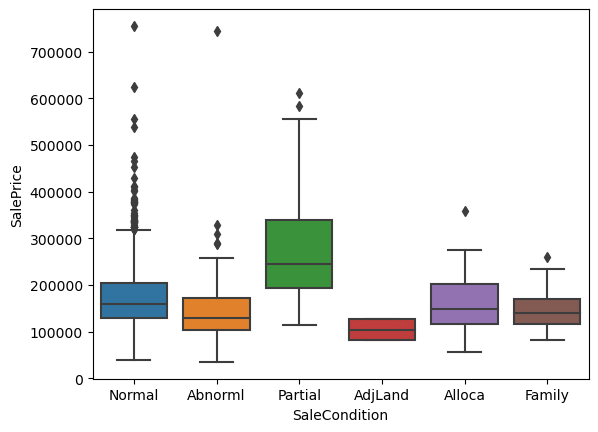

In [18]:
for i in cat_cols:
    sns.boxplot(data=data, x=i, y=data['SalePrice'])
    plt.show()

# Data Preprocessing

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Creating Dummy Variables

In [20]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
cat_cols1 = cat_cols.drop(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 
               'GarageQual', 'GarageCond'])
x = pd.get_dummies(data[cat_cols1], dtype=int, drop_first=True)

In [22]:
x

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
q = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 
               'GarageQual', 'GarageCond']
a = pd.get_dummies(data[q], dtype=int)
a.columns

Index(['BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA',
       'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_NA',
       'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_NA', 'BsmtExposure_No',
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NA',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA',
       'GarageFinish_Fin', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_NA', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Ex',
       'GarageCond_Fa', 'GarageCond

In [24]:
# removing the redundant columns for missing garage and basement
a.drop(columns=['BsmtCond_NA', 'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFinType2_NA', 'GarageFinish_NA', 'GarageQual_NA', 
               'GarageCond_NA'], inplace=True)

In [25]:
a

,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1456,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1457,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1458,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
data = pd.concat([data, x], axis=1)
data = pd.concat([data, a], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,0,1


In [27]:
# removing the categorical variables from the dataset
data.drop(columns=cat_cols, inplace=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


## Train-Test Data Split

In [28]:
data_train, data_test = train_test_split(data, train_size=0.8, random_state=100)

In [29]:
data_train = pd.DataFrame(data_train, columns=data.columns)
data_test = pd.DataFrame(data_test, columns=data.columns)

In [30]:
data_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.0,292.000000
mean,54.965753,70.472423,10682.267123,6.102740,5.578767,1973.065068,1984.739726,101.797945,412.955479,38.719178,...,0.006849,0.020548,0.010274,0.0,0.907534,0.003425,0.013699,0.010274,0.0,0.917808
std,41.237292,23.265092,10540.709987,1.390836,1.144520,28.583739,20.522908,168.923996,423.777978,135.558194,...,0.082618,0.142109,0.101012,0.0,0.290180,0.058521,0.116436,0.101012,0.0,0.275128
min,20.000000,21.000000,1533.000000,1.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,20.000000,60.000000,7756.000000,5.000000,5.000000,1957.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,50.000000,70.049958,9203.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,326.500000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,60.000000,79.000000,11651.250000,7.000000,6.000000,2002.000000,2004.000000,178.500000,681.750000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2009.000000,2010.000000,921.000000,1636.000000,1127.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


## Normalising the data

In [31]:
sc = MinMaxScaler()

In [32]:
data_train = pd.DataFrame(sc.fit_transform(data_train), columns=data_train.columns)
data_test = pd.DataFrame(sc.transform(data_test), columns=data_test.columns)

In [33]:
data_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0.000000,0.133562,0.035991,0.333333,0.625,0.717391,0.350000,0.000000,0.109142,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.235294,0.232877,0.048354,0.666667,0.500,0.956522,0.900000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.143836,0.030732,0.666667,0.500,0.891304,0.766667,0.023750,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.235294,0.198630,0.037136,0.666667,0.500,0.971014,0.933333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.352941,0.188356,0.040104,0.555556,0.625,0.760870,0.450000,0.000000,0.092488,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.176471,0.133562,0.042721,0.555556,0.750,0.347826,0.000000,0.000000,0.087349,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
288,0.000000,0.167979,0.031901,0.666667,0.500,0.942029,0.866667,0.184375,0.174699,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
289,0.588235,0.047945,0.013901,0.666667,0.500,0.971014,0.950000,0.000000,0.195960,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
290,0.235294,0.106164,0.211685,0.777778,0.750,0.884058,0.916667,0.330000,0.241141,0.122117,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y_train = data_train.pop('SalePrice')
X_train = data_train

In [35]:
y_test = data_test.pop('SalePrice')
X_test = data_test

# Model Building

## We will be building the following models for the dataset and choose the most accurate one:
- Linear Regression
- Ridge Regression
- Lasso Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [39]:
y_pred_lr = lr.predict(X_train)

In [40]:
r2_lr = r2_score(y_true=y_train, y_pred=y_pred_lr)
r2_lr

0.9407100840708672

In [41]:
rmse_lr = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_lr))
rmse_lr

0.026787426110195387

In [42]:
y_pred_lr_test = lr.predict(X_test)

In [43]:
r2_lr_test = r2_score(y_true=y_test, y_pred=y_pred_lr_test)
r2_lr_test

-7.267046073124734e+20

In [44]:
rmse_lr_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lr_test))
rmse_lr_test

3001655898.351951

## Ridge Regression

In [45]:
alpha = np.logspace(-5, 3, 100)

In [46]:
ridge_cv = RidgeCV(alphas=alpha, cv=5).fit(X_train, y_train)

In [47]:
ridge_cv.alpha_

7.924828983539186

The optimum hyperparameter for Ridge regression as found through cross validation is 7.924828983539186

In [48]:
rid = Ridge(alpha=ridge_cv.alpha_)

In [49]:
rid.fit(X=X_train, y=y_train)

Ridge(alpha=7.924828983539186)

In [50]:
y_pred_rid = rid.predict(X_train)

In [51]:
r2_rid = r2_score(y_true=y_train, y_pred=y_pred_rid)
r2_rid

0.8835735526876723

In [52]:
rmse_rid = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_rid))
rmse_rid

0.0375375904383299

In [53]:
y_pred_rid_test = rid.predict(X_test)

In [54]:
r2_rid_test = r2_score(y_true=y_test, y_pred=y_pred_rid_test)
r2_rid_test

0.8826368614236625

In [55]:
rmse_rid_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_rid_test))
rmse_rid_test

0.038145894661289245

## Lasso Regression

In [56]:
lasso_cv = LassoCV(alphas=alpha, cv=5).fit(X_train, y_train)

In [57]:
lasso_cv.alpha_

0.0002848035868435802

The optimum hyperparameter for Ridge regression as found through cross validation is 0.0002848035868435802

In [58]:
las = Lasso(alpha=lasso_cv.alpha_)

In [59]:
las.fit(X_train, y_train)

Lasso(alpha=0.0002848035868435802)

In [60]:
y_pred_las = las.predict(X_train)

In [61]:
r2_las = r2_score(y_true=y_train, y_pred=y_pred_las)
r2_las

0.8724811593967157

In [62]:
rmse_las = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_las))
rmse_las

0.0392850894708999

In [63]:
y_pred_las_test = las.predict(X_test)

In [64]:
r2_las_test = r2_score(y_true=y_test, y_pred=y_pred_las_test)
r2_las_test

0.8814990058953969

In [65]:
rmse_las_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_las_test))
rmse_las_test

0.03833036408253015

# Residual and Model Metric Analysis

## Model Metric Analysis

In [66]:
mod_an = pd.DataFrame({'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
                      'R2 Train': [round(r2_lr*100, 2), round(r2_rid*100, 2), round(r2_las*100, 2)],
                      'R2 Test': [round(r2_lr_test*100, 2), round(r2_rid_test*100, 2), round(r2_las_test*100, 2)],
                      'RMSE Train': [rmse_lr, rmse_rid, rmse_las],
                      'RMSE Test': [rmse_lr_test, rmse_rid_test, rmse_las_test]})
mod_an

,Model,R2 Train,R2 Test,RMSE Train,RMSE Test
0,Linear Regression,94.07,-7.267046e+22,0.026787,3.001656e+09
1,Ridge Regression,88.36,8.826000e+01,0.037538,3.814589e-02
2,Lasso Regression,87.25,8.815000e+01,0.039285,3.833036e-02


From the $R^2$ score and Root Mean Square Error of Linear, Ridge and Lasso Regression we can come to the following conclusions:
- Linear Regression performs very well on the train set while on the test set, the $R^2$ value is negative, which is a sign of severe overfitting or error in the model. RMSE value for the Linear regression also turns out to be very high, showing signs of overfitting
- Ridge Regression performs quite well on both the train and test set with very similar $R^2$ value and RMSE value on both train and test set
- Lasso has by far shown the best performance. the $R^2$ score and RMSE value for the test set is better than the train set and also is very similar to that of the trian set.

## Residual Analysis

#### Linear Regression

In [67]:
res_lr = y_test - y_pred_lr_test

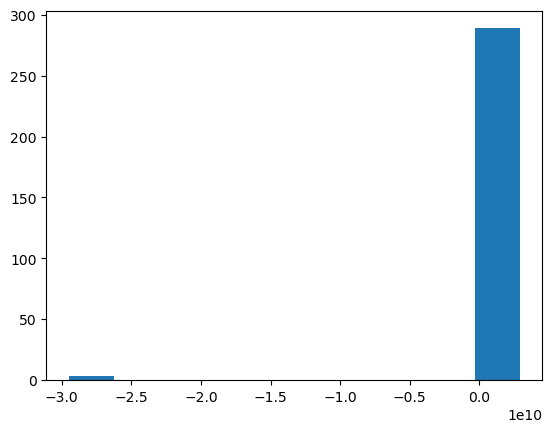

In [68]:
plt.hist(res_lr)
plt.show()

#### Ridge Regression

In [69]:
res_rid = y_test - y_pred_rid_test

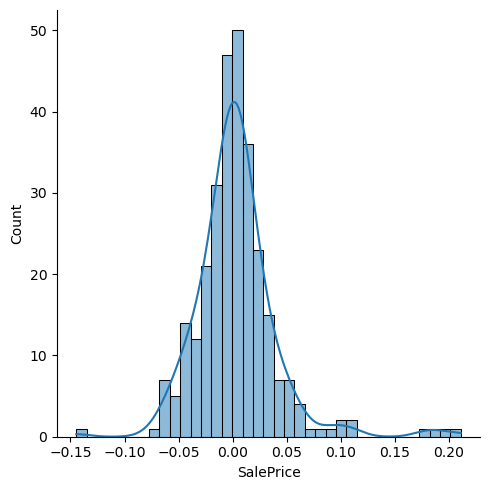

In [70]:
sns.displot(res_rid, kde=True)
plt.show()

#### Lasso Regression

In [71]:
red_las = y_test - y_pred_las_test

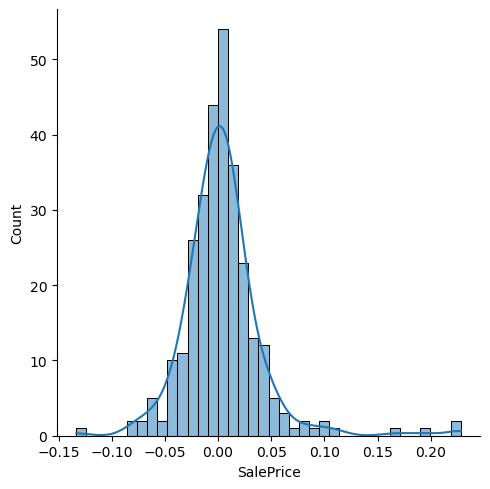

In [72]:
sns.displot(red_las, kde=True)
plt.show()

From the residual analysis of the three models, we come to the following conclusions:
- The spread of residuals for Linear regression is highly right skewed
- The spread of rediduals for Ridge regression is fairly normally distributed, with the some minor undulations in the right tail
- The spread of rediduals for Lasso regression is quite normally distributed with no or negligible undulations towards the tails

## Homoscedasticity

#### Linear Regression

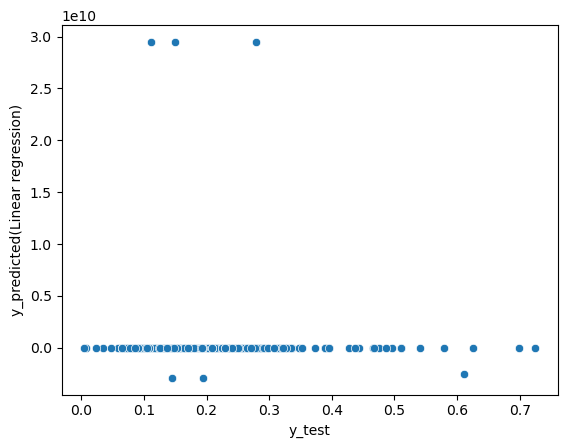

In [73]:
sns.scatterplot(x=y_test, y=y_pred_lr_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted(Linear regression)')
plt.show()

#### Ridge Regression

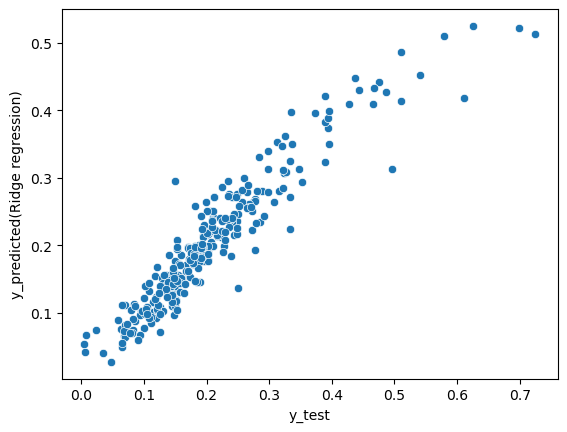

In [74]:
sns.scatterplot(x=y_test, y=y_pred_rid_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted(Ridge regression)')
plt.show()

#### Lasso Regression

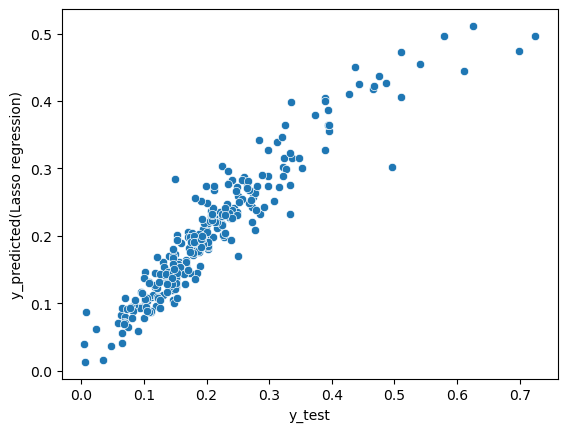

In [75]:
sns.scatterplot(x=y_test, y=y_pred_las_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted(Lasso regression)')
plt.show()

From the above plots, we see te following:
- Homoscedasticity is not followed by Linear Regression
- Homoscedasticity is being followed by Ridge Regression and Lasso Regression

# Interpretation

From the above analysis, we can conclude that the Lasso Regression performs better than Linear and Ridge Regression. Hence moving forward with it, we get the following:

In [76]:
coeff = las.coef_
len(coeff)

240

In [77]:
selected_features = X_train.columns[coeff != 0]
coeff = coeff[coeff != 0]

In [78]:
for i, feature in enumerate(selected_features):
    print(feature, coeff[i])

MSSubClass -0.03726289381974225
OverallQual 0.12307540014721603
OverallCond 0.03141661140673156
YearRemodAdd 0.012432560888896023
MasVnrArea 0.01381417341173542
2ndFlrSF 0.007853886101556485
GrLivArea 0.26885949676515714
BsmtFullBath 0.02728315910811043
FullBath 0.021580693011408785
HalfBath 0.005263045684974821
TotRmsAbvGrd 0.016925599139445923
Fireplaces 0.025679505520647666
GarageCars 0.049703269185600335
WoodDeckSF 0.006210335279337982
YrSold -0.0012127963556915248
MSZoning_RL 0.0026083721273545404
MSZoning_RM -0.009440461912098595
LotShape_Reg -0.0021052291350452525
LandContour_Low 0.005896845501698824
LandContour_Lvl 0.0071962871704327165
LotConfig_CulDSac 0.012449424479525885
LotConfig_FR2 -0.005984020770346496
LandSlope_Mod 0.002272491407175887
Neighborhood_Crawfor 0.022879073330153984
Neighborhood_Edwards -0.016210180860430596
Neighborhood_Gilbert -0.0020686925794416297
Neighborhood_Mitchel -0.005638691848132906
Neighborhood_NAmes -0.006625302959767636
Neighborhood_NoRidge 0.0

The following features are selected by Lasso regression with the following coefficients:
- **MSSubClass**: -0.03726289381974225
- **OverallQual**: 0.12307540014721603
- **OverallCond**: 0.03141661140673156
- **YearRemodAdd**: 0.012432560888896023
- **MasVnrArea**: 0.01381417341173542
- **2ndFlrSF**: 0.007853886101556485
- **GrLivArea**: 0.26885949676515714
- **BsmtFullBath**: 0.02728315910811043
- **FullBath**: 0.021580693011408785
- **HalfBath**: 0.005263045684974821
- **TotRmsAbvGrd**: 0.016925599139445923
- **Fireplaces**: 0.025679505520647666
- **GarageCars**: 0.049703269185600335
- **WoodDeckSF**: 0.006210335279337982
- **YrSold**: -0.0012127963556915248
- **MSZoning_RL**: 0.0026083721273545404
- **MSZoning_RM**: -0.009440461912098595
- **LotShape_Reg**: -0.0021052291350452525
- **LandContour_Low**: 0.005896845501698824
- **LandContour_Lvl**: 0.0071962871704327165
- **LotConfig_CulDSac**: 0.012449424479525885
- **LotConfig_FR2**: -0.005984020770346496
- **LandSlope_Mod**: 0.002272491407175887
- **Neighborhood_Crawfor**: 0.022879073330153984
- **Neighborhood_Edwards**: -0.016210180860430596
- **Neighborhood_Gilbert**: -0.0020686925794416297
- **Neighborhood_Mitchel**: -0.005638691848132906
- **Neighborhood_NAmes**: -0.006625302959767636
- **Neighborhood_NoRidge**: 0.06819491887776051
- **Neighborhood_NridgHt**: 0.04018595311504068
- **Neighborhood_OldTown**: -0.003112087489060396
- **Neighborhood_Somerst**: 0.018073788820202996
- **Neighborhood_StoneBr**: 0.0326292204561403
- **Condition1_Norm**: 0.01568440645838193
- **Condition2_PosN**: -0.04215446079641014
- **BldgType_Duplex**: -0.0037804376552809786
- **BldgType_TwnhsE**: -0.0002038430217951763
- **HouseStyle_1Story**: 0.0027824852707788897
- **HouseStyle_2Story**: -9.706736004445548e-05
- **RoofStyle_Gable**: -0.004090274800699056
- **RoofMatl_WdShngl**: 0.041722011551320305
- **Exterior1st_BrkFace**: 0.0199597170126458
- **Exterior2nd_Plywood**: -0.00016746059463736035
- **Exterior2nd_Stucco**: -0.005869047761355803
- **Exterior2nd_VinylSd**: 0.0041903977199982895
- **Exterior2nd_Wd Shng**: -0.00672039304652877
- **ExterQual_TA**: -0.00891319277506718
- **Foundation_CBlock**: 0.0021657394477735178
- **Foundation_PConc**: 0.002561615132522299
- **HeatingQC_Gd**: -0.0012996986416890515
- **HeatingQC_TA**: -0.0025210814887426203
- **CentralAir_Y**: 0.0032531883036222634
- **KitchenQual_Fa**: -0.02234433681630503
- **KitchenQual_Gd**: -0.030904201086832755
- **KitchenQual_TA**: -0.03334875666507397
- **Functional_Typ**: 0.012604469847972432
- **PavedDrive_Y**: 0.0011559037506444281
- **SaleType_New**: 0.015977202847188933
- **SaleCondition_Normal**: 0.002268023089463718
- **SaleCondition_Partial**: 0.0025144921271272715
- **BsmtQual_Ex**: 0.04645298115015173
- **BsmtQual_NA**: -0.0008344152448203942
- **BsmtCond_TA**: 0.008095804919049819
- **BsmtExposure_Gd**: 0.03492958392917223
- **BsmtExposure_No**: -0.007956517775311764
- **BsmtFinType1_ALQ**: 0.001202849166169957
- **BsmtFinType1_BLQ**: 0.002858986791078289
- **BsmtFinType1_GLQ**: 0.008631377849752766
- **BsmtFinType1_Unf**: -0.006522878758585804
- **GarageType_Attchd**: 0.0028585849966917386
- **GarageType_Detchd**: -0.00014856870564385245
- **GarageFinish_Fin**: 0.008255457606981714
- **GarageFinish_Unf**: -0.0005205665079405655
- **GarageQual_Fa**: -0.007055210820481505


The features and their coefficients sorted in order of their significance is as follows:

| Feature | Coefficient |
| --- | --- |
| GrLivArea | 0.26885949676515714 |
| Neighborhood_NoRidge | 0.06819491887776051 |
| RoofMatl_WdShngl | 0.041722011551320305 |
| Neighborhood_NridgHt | 0.04018595311504068 |
| BsmtQual_Ex | 0.04645298115015173 |
| GarageCars | 0.049703269185600335 |
| BsmtExposure_Gd | 0.03492958392917223 |
| Neighborhood_StoneBr | 0.0326292204561403 |
| OverallQual | 0.12307540014721603 |
| BsmtFullBath | 0.02728315910811043 |
| Fireplaces | 0.025679505520647666 |
| Neighborhood_Crawfor | 0.022879073330153984 |
| FullBath | 0.021580693011408785 |
| Exterior1st_BrkFace | 0.0199597170126458 |
| Neighborhood_Somerst | 0.018073788820202996 |
| SaleType_New | 0.015977202847188933 |
| Functional_Typ | 0.012604469847972432 |
| YearRemodAdd | 0.012432560888896023 |
| LotConfig_CulDSac | 0.012449424479525885 |
| MasVnrArea | 0.01381417341173542 |
| Condition1_Norm | 0.01568440645838193 |
| TotRmsAbvGrd | 0.016925599139445923 |
| KitchenQual_Fa | -0.02234433681630503 |
| KitchenQual_Gd | -0.030904201086832755 |
| KitchenQual_TA | -0.03334875666507397 |
| OverallCond | 0.03141661140673156 |
| Condition2_PosN | -0.04215446079641014 |
| MSSubClass | -0.03726289381974225 |
| 2ndFlrSF | 0.007853886101556485 |
| BsmtCond_TA | 0.008095804919049819 |
| BsmtFinType1_GLQ | 0.008631377849752766 |
| GarageFinish_Fin | 0.008255457606981714 |
| LandContour_Lvl | 0.0071962871704327165 |
| WoodDeckSF | 0.006210335279337982 |
| LandContour_Low | 0.005896845501698824 |
| Exterior2nd_VinylSd | 0.0041903977199982895 |
| CentralAir_Y | 0.0032531883036222634 |
| MSZoning_RL | 0.0026083721273545404 |
| HouseStyle_1Story | 0.0027824852707788897 |
| GarageType_Attchd | 0.0028585849966917386 |
| BsmtFinType1_BLQ | 0.002858986791078289 |
| LandSlope_Mod | 0.002272491407175887 |
| SaleCondition_Normal | 0.002268023089463718 |
| Foundation_CBlock | 0.0021657394477735178 |
| Foundation_PConc | 0.002561615132522299 |
| BsmtFinType1_ALQ | 0.001202849166169957 |
| PavedDrive_Y | 0.0011559037506444281 |
| SaleCondition_Partial | 0.0025144921271272715 |
| HalfBath | 0.005263045684974821 |
| BsmtFinType1_Unf | -0.006522878758585804 |
| Neighborhood_NAmes | -0.006625302959767636 |
| Exterior2nd_Wd Shng | -0.00672039304652877 |
| GarageQual_Fa | -0.007055210820481505 |
| BsmtExposure_No | -0.007956517775311764 |
| ExterQual_TA | -0.00891319277506718 |
| MSZoning_RM | -0.009440461912098595 |
| LotShape_Reg | -0.0021052291350452525 |
| LotConfig_FR2 | -0.005984020770346496 |
| Neighborhood_Mitchel | -0.005638691848132906 |
| Exterior2nd_Stucco | -0.005869047761355803 |
| Neighborhood_Gilbert | -0.0020686925794416297 |
| Neighborhood_OldTown | -0.003112087489060396 |
| RoofStyle_Gable | -0.004090274800699056 |
| BldgType_Duplex | -0.0037804376552809786 |
| HeatingQC_Gd | -0.0012996986416890515 |
| HeatingQC_TA | -0.0025210814887426203 |
| GarageFinish_Unf | -0.0005205665079405655 |
| BldgType_TwnhsE | -0.0002038430217951763 |
| GarageType_Detchd | -0.00014856870564385245 |
| Exterior2nd_Plywood | -0.00016746059463736035 |
| BsmtQual_NA | -0.0008344152448203942 |
| HouseStyle_2Story | -9.706736004445548e-05 |
| YrSold | -0.0012127963556915248 |
